# 미니 프로젝트(1)-최지원

과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

조건: 변수 2개 이상 연결한 결과값 포함

위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

제출기한: 2021.10.08 (금) 23:59

In [19]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#데이터 불러오기
train=pd.read_csv("C:/Users/judy0/OneDrive/바탕 화면/Essa/영화 관객수/movies_train.csv")

In [4]:
#자료 탐색
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [5]:
train.shape

(600, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [7]:
pd.options.display.float_format = '{:.1f}'.format

In [8]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


In [9]:
#결측치 확인
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [10]:
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [11]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


In [14]:
#결측치 0으로 처리-!!
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [15]:
train.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [16]:
#time 데이터 datetime 오브젝트로 변환
train['release_time']=pd.to_datetime(train['release_time'])

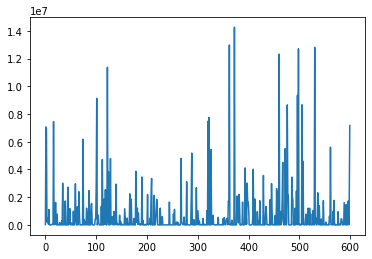

In [22]:
fig,ax=plt.subplots()
ax=train['box_off_num'].plot()
plt.show()

### 장르와 관객 수

In [17]:
#관객 많은 순으로 정렬하기-!!
train[['genre','box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


<AxesSubplot:xlabel='genre'>

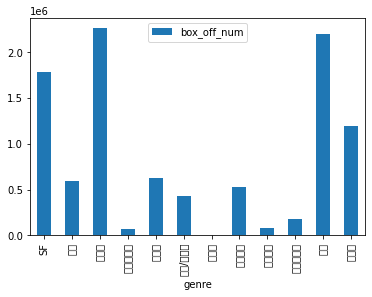

In [21]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

train[['genre','box_off_num']].groupby('genre').mean().plot(kind='bar')

In [52]:
#장르에 따라 관객수가 차이가 많이 나는 것으로 보아 어느정도 관련성이 있어보인다.
#뮤지컬 장르가 관객수가 제일 적고, 느와르>액션>SF>코미디 장르가 관객수가 많다.

### 개봉일과 관객수

In [53]:
#개봉 월 추출
train['release_month']=train['release_time'].dt.month

In [55]:
train[['release_month','box_off_num']].groupby('release_month').mean().sort_index()

,box_off_num
release_month,
1,1365930.6
2,663025.2
3,273887.4
4,258166.7
5,575685.2
6,512286.5
7,1113807.2
8,1029161.7
9,731528.6


<AxesSubplot:xlabel='release_month'>

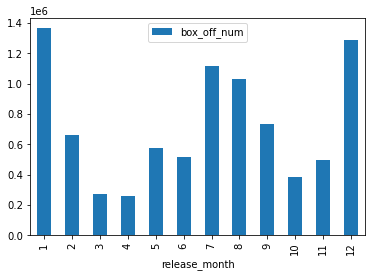

In [56]:
train[['release_month','box_off_num']].groupby('release_month').mean().sort_index().plot(kind='bar')

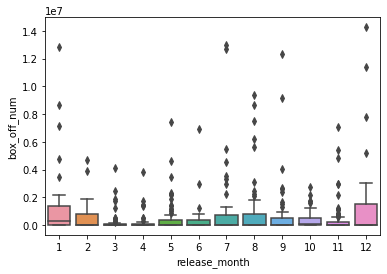

In [57]:
baxplot=plt.subplots()
boxplot=sns.boxplot(x='release_month', y='box_off_num', data=train)

In [ ]:
#상영월에 따라 관객수가 차이가 많이 나는 것으로 보아 어느정도 관련성이 있어보인다.
#상영월이 12월,1월, 7월,8월일 때 관객 수가 눈에 띄게 많다.
#상영월이 3월,4월일 때 관객 수가 매우 적다.

### 상영시간과 관객수

In [59]:
train[['time','box_off_num']].groupby('time').mean().sort_index()

,box_off_num
time,
45,2919.0
60,328.0
61,129.5
62,223103.0
63,79.0
...,...
153,1744585.0
156,2260512.0
163,3350311.0


<AxesSubplot:xlabel='time'>

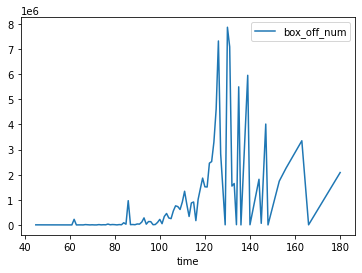

In [60]:
train[['time','box_off_num']].groupby('time').mean().sort_index().plot()

In [ ]:
#상영시간에 따라 관객수가 차이가 많이 나는 것으로 보아 어느정도 관련성이 있어보인다.
#상영시간이 130-150분 정도일 때 관객 수가 가장 많다.

### 상영등급과 관객수

In [62]:
train['screening_rat'].value_counts().sort_values(ascending=False)

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

In [63]:
train[['screening_rat','box_off_num']].groupby('screening_rat').mean().sort_values('box_off_num')

,box_off_num
screening_rat,
전체 관람가,135100.5
청소년 관람불가,364181.3
12세 관람가,844980.9
15세 관람가,1247518.6


<AxesSubplot:xlabel='screening_rat'>

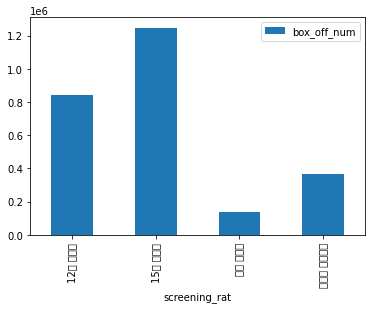

In [64]:
train[['screening_rat','box_off_num']].groupby('screening_rat').mean().sort_index().plot(kind='bar')

In [ ]:
#상영등급에 따라 관객수가 차이가 나는 것으로 보아 어느정도 관련성이 있어보인다.
#상영등급이 12세, 15세 관람가인 영화가 관객 수가 다른 등급들에 비해 많다.

### 스텝수와 관객수

In [66]:
train[['num_staff','box_off_num']].groupby('num_staff').mean().sort_index()

,box_off_num
num_staff,
0,7805.6
1,37155.2
2,36928.7
3,403465.3
4,4129.3
...,...
683,2260512.0
687,7482180.0
719,2192276.0


<AxesSubplot:xlabel='num_staff'>

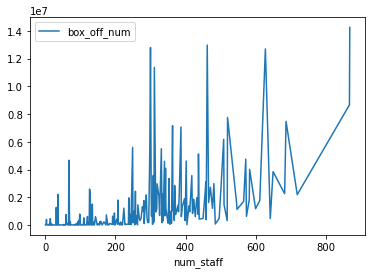

In [67]:
train[['num_staff','box_off_num']].groupby('num_staff').mean().sort_index().plot()

In [ ]:
#스텝수에 따라 관객수가 큰 차이가 나지 않는 것으로 보아 큰 관련성은 없어보인다.

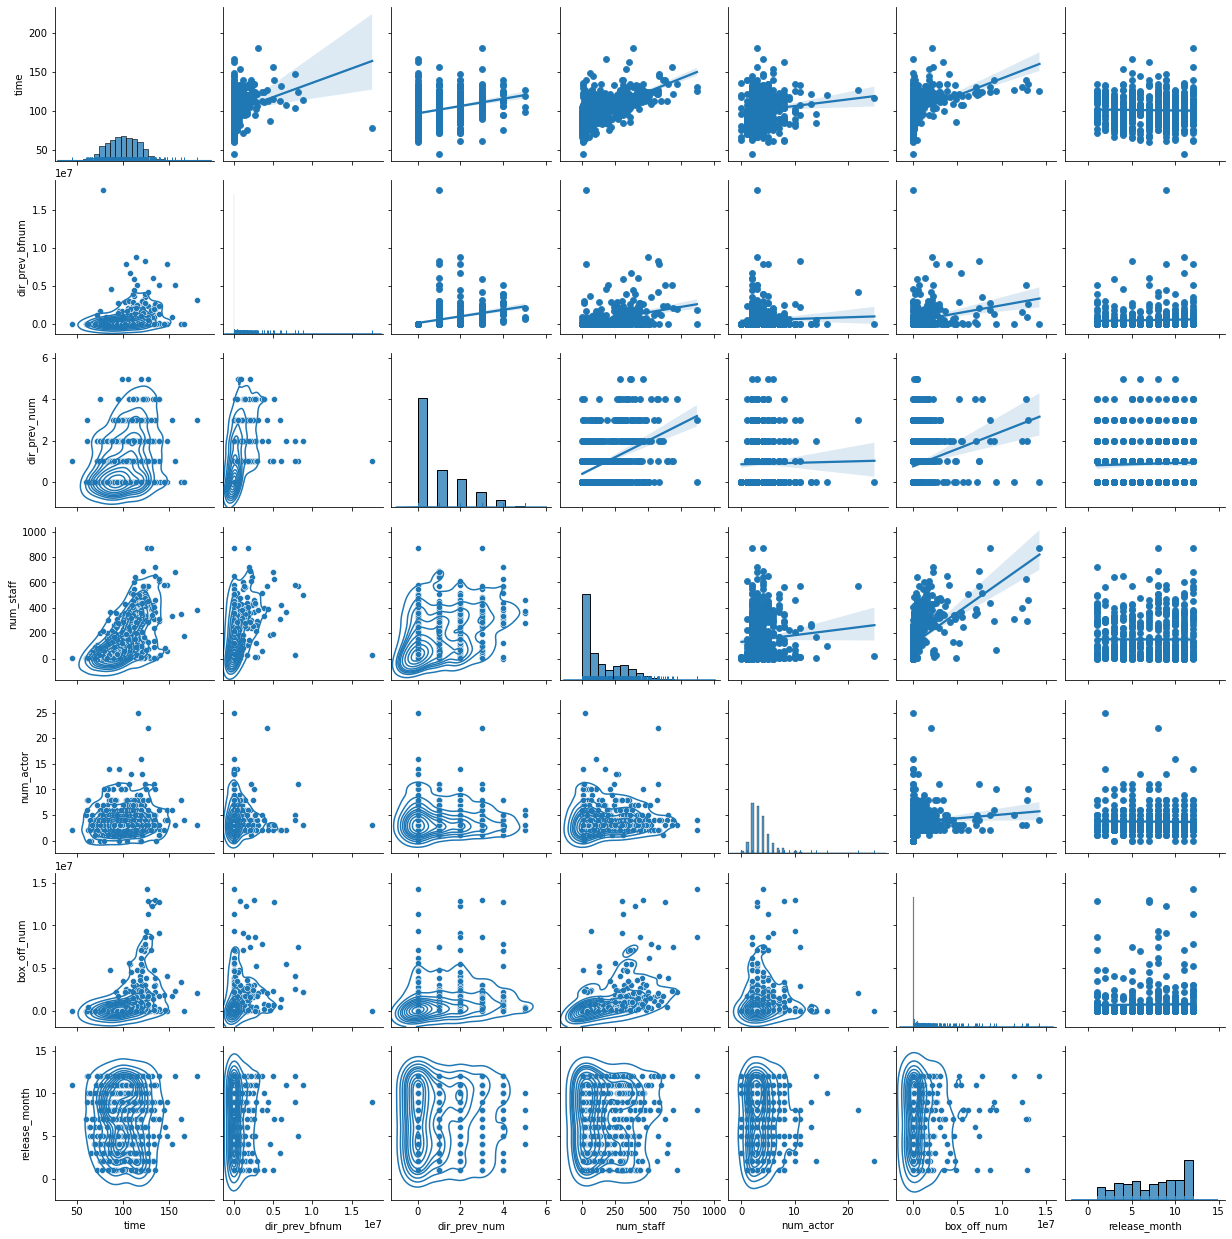

In [69]:
#관계그래프
fig=sns.pairplot(train)
fig=fig.map_upper(sns.regplot)
fig=fig.map_lower(sns.kdeplot)
fig=fig.map_diag(sns.distplot,rug=True)
plt.show()